# Llama3 8B - Evaluation

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

sys.path.append(r"C:\Users\janbe\Documents\GitHub Repos\pulse")
from src.eval.llm_analyzer import LLMAnalyzer
from src.eval.pulse_score import PULSEScoreCalculator

In [2]:
model_id = "llama3p18b"
base_output_dir = (
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark"
)
model_output_dir = os.path.join(base_output_dir, "llms", model_id)
results_output_dir = os.path.join(base_output_dir, r"results_output")


prompt_approaches = os.listdir(model_output_dir)
print(prompt_approaches)

['clinical_workflow_agent_preprocessor', 'collaborative_reasoning_agent_preprocessor', 'hybrid_reasoning_agent_preprocessor', 'liu_2023_few_shot_preprocessor', 'sarvari_2024_aggregation_preprocessor', 'zhu_2024a_cot_preprocessor', 'zhu_2024b_one_shot_preprocessor', 'zhu_2024b_zero_shot_preprocessor', 'zhu_2024c_categorization_summary_agent_preprocessor']


In [3]:
print("Prompt Approaches:")
for i, approach in enumerate(prompt_approaches, 1):
    print(f"{i}. {approach}")

# Try to load results_dict from json before calculating

results_loaded = False
results_output_jsons = os.path.join(results_output_dir, "jsons")
results_json_path = f"{model_id}_results.json"


if not results_loaded:

    best_prompt_approach = None

    results_dict = {}

    mdata_dict = {}

    cost_df = pd.DataFrame()

    for prompt_approach in prompt_approaches:
        is_agent = False
        if "agent" in prompt_approach:
            is_agent = True

        if not os.path.isdir(os.path.join(model_output_dir, prompt_approach)):
            continue

        print("=" * 50)
        print(f"\nPrompting Approach {prompt_approach}\n")

        cat_files = LLMAnalyzer.categorize_files(
            [os.path.join(model_output_dir, prompt_approach)],
            verbose=False,
        )
        if is_agent:
            df_mdata = LLMAnalyzer.load_metadata(
                cat_files["metadata_files"], verbose=True, fix_csv=True
            )
        else:
            df_mdata = LLMAnalyzer.load_metadata(
                cat_files["metadata_files"], verbose=True, fix_csv=False
            )

        summary = LLMAnalyzer.print_approach_summary(
            df_mdata, input_token_cost=3, output_token_cost=15
        )

        # Filter for final prediction step if agent is used
        if "Step Name" in df_mdata.columns:
            df_mdata = df_mdata[
                df_mdata["Step Name"] == "final_prediction"
            ].reset_index(drop=True)

        ps = PULSEScoreCalculator()
        pulse_score = ps.calculate_pulse_score_from_raw_data(
            df=df_mdata,
        )
        pulse_score["model_id"] = model_id
        pulse_score["prompting_id"] = prompt_approach
        pulse_score_temp = pulse_score["overall"]["overall_score"]
        results_dict[prompt_approach] = pulse_score
        mdata_dict[prompt_approach] = df_mdata
        cost_df[prompt_approach] = [
            summary["input_cost"].sum(),
            summary["output_cost"].sum(),
            summary["thinking_cost"].sum(),
            summary["total_cost"].sum(),  # Reasoning Tokens included in output cost
        ]

        cost_df.index = ["input_cost", "output_cost", "thinking_cost", "total_cost"]
        if best_prompt_approach is None or pulse_score_temp > best_prompt_approach[1]:

            best_prompt_approach = (prompt_approach, pulse_score_temp)

    display(cost_df)
    print(
        f"\nBest prompt approach: {best_prompt_approach[0]} with PULSE score: {best_prompt_approach[1]}"
    )

    # Save results as json. Uses pulse-result format
    json_output_path = os.path.join(results_output_jsons, f"{model_id}_results.json")
    LLMAnalyzer.save_results_dict_as_json(results_dict, json_output_path)

Prompt Approaches:
1. clinical_workflow_agent_preprocessor
2. collaborative_reasoning_agent_preprocessor
3. hybrid_reasoning_agent_preprocessor
4. liu_2023_few_shot_preprocessor
5. sarvari_2024_aggregation_preprocessor
6. zhu_2024a_cot_preprocessor
7. zhu_2024b_one_shot_preprocessor
8. zhu_2024b_zero_shot_preprocessor
9. zhu_2024c_categorization_summary_agent_preprocessor

Prompting Approach clinical_workflow_agent_preprocessor

Extracting metadata from files:
Model Name: Llama3, Task: aki, Dataset: eicu, Timestamp: 20250630_055356
Model Name: Llama3, Task: aki, Dataset: hirid, Timestamp: 20250630_055356
Model Name: Llama3, Task: aki, Dataset: miiv, Timestamp: 20250630_055356
Model Name: Llama3, Task: mortality, Dataset: eicu, Timestamp: 20250630_055356
Model Name: Llama3, Task: mortality, Dataset: hirid, Timestamp: 20250630_055356
Model Name: Llama3, Task: mortality, Dataset: miiv, Timestamp: 20250630_055356
Model Name: Llama3, Task: sepsis, Dataset: eicu, Timestamp: 20250630_055356
M

IndexError: single positional indexer is out-of-bounds

In [3]:
model_id = "llama3p18b"
base_output_dir = (
    r"C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark"
)
model_output_dir = os.path.join(base_output_dir, "llms", model_id)
results_output_dir = os.path.join(base_output_dir, r"results_output")


prompt_approaches = os.listdir(model_output_dir)
print(prompt_approaches)

# Try to load results_dict from json before calculating
results_loaded = False
results_output_jsons = os.path.join(results_output_dir, "jsons")
results_json_path = f"{model_id}_results.json"

if not results_loaded:
    best_prompt_approach = None

    results_dict = {}
    cost_df = pd.DataFrame()

    for prompt_approach in prompt_approaches:

        if not os.path.isdir(os.path.join(model_output_dir, prompt_approach)):
            continue

        print("=" * 50)
        print(f"\nPrompting Approach {prompt_approach}")

        cat_files = LLMAnalyzer.categorize_files(
            [os.path.join(model_output_dir, prompt_approach)],
            verbose=False,
        )

        df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"], verbose=True)
        summary = LLMAnalyzer.print_approach_summary(
            df_mdata, input_token_cost=0, output_token_cost=0
        )

        # Filter for final prediction step if agent is used

        if "Step Name" in df_mdata.columns:

            df_mdata = df_mdata[
                df_mdata["Step Name"] == "final_prediction"
            ].reset_index(drop=True)

        ps = PULSEScoreCalculator()

        pulse_score = ps.calculate_pulse_score_from_raw_data(
            df=df_mdata,
        )
        pulse_score["model_id"] = model_id
        pulse_score["prompting_id"] = prompt_approach

        pulse_score_temp = pulse_score["overall"]["overall_score"]

        results_dict[prompt_approach] = pulse_score
        cost_df[prompt_approach] = [
            summary["input_cost"].sum(),
            summary["output_cost"].sum(),
            summary["thinking_cost"].sum(),
            summary["total_cost"].sum(),  # Reasoning Tokens are billed as output tokens
        ]
        cost_df.index = ["input_cost", "output_cost", "thinking_cost", "total_cost"]

        if best_prompt_approach is None or pulse_score_temp > best_prompt_approach[1]:

            best_prompt_approach = (prompt_approach, pulse_score_temp)

    display(cost_df)

    print(
        f"\nBest prompt approach: {best_prompt_approach[0]} with PULSE score: {best_prompt_approach[1]}"
    )

    # Save results as json. Uses pulse-result format
    json_output_path = os.path.join(results_output_jsons, f"{model_id}_results.json")
    LLMAnalyzer.save_results_dict_as_json(
        results_dict, model_output_dir, json_output_path
    )

['clinical_workflow_agent_preprocessor', 'collaborative_reasoning_agent_preprocessor', 'hybrid_reasoning_agent_preprocessor', 'liu_2023_few_shot_preprocessor', 'sarvari_2024_aggregation_preprocessor', 'zhu_2024a_cot_preprocessor', 'zhu_2024b_one_shot_preprocessor', 'zhu_2024b_zero_shot_preprocessor', 'zhu_2024c_categorization_summary_agent_preprocessor']

Prompting Approach clinical_workflow_agent_preprocessor
Extracting metadata from files:
Model Name: Llama3, Task: aki, Dataset: eicu, Timestamp: 20250630_055356
Model Name: Llama3, Task: aki, Dataset: hirid, Timestamp: 20250630_055356
Model Name: Llama3, Task: aki, Dataset: miiv, Timestamp: 20250630_055356
Model Name: Llama3, Task: mortality, Dataset: eicu, Timestamp: 20250630_055356
Model Name: Llama3, Task: mortality, Dataset: hirid, Timestamp: 20250630_055356
Model Name: Llama3, Task: mortality, Dataset: miiv, Timestamp: 20250630_055356
Model Name: Llama3, Task: sepsis, Dataset: eicu, Timestamp: 20250630_055356
Model Name: Llama3, 

,clinical_workflow_agent_preprocessor,collaborative_reasoning_agent_preprocessor,hybrid_reasoning_agent_preprocessor,liu_2023_few_shot_preprocessor,sarvari_2024_aggregation_preprocessor,zhu_2024a_cot_preprocessor,zhu_2024b_one_shot_preprocessor,zhu_2024b_zero_shot_preprocessor,zhu_2024c_categorization_summary_agent_preprocessor
input_cost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
output_cost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thinking_cost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_cost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Best prompt approach: liu_2023_few_shot_preprocessor with PULSE score: 52.50720364045733
Saved 81 result entries to C:\Users\janbe\Documents\GitHub Repos\pulse\output_to_keep\results_benchmark\results_output\jsons\llama3p18b_results.json


## Model Metrics

In [4]:
df_results = LLMAnalyzer.load_metrics_from_prompt_approaches(model_output_dir, prompt_approaches)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:943: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


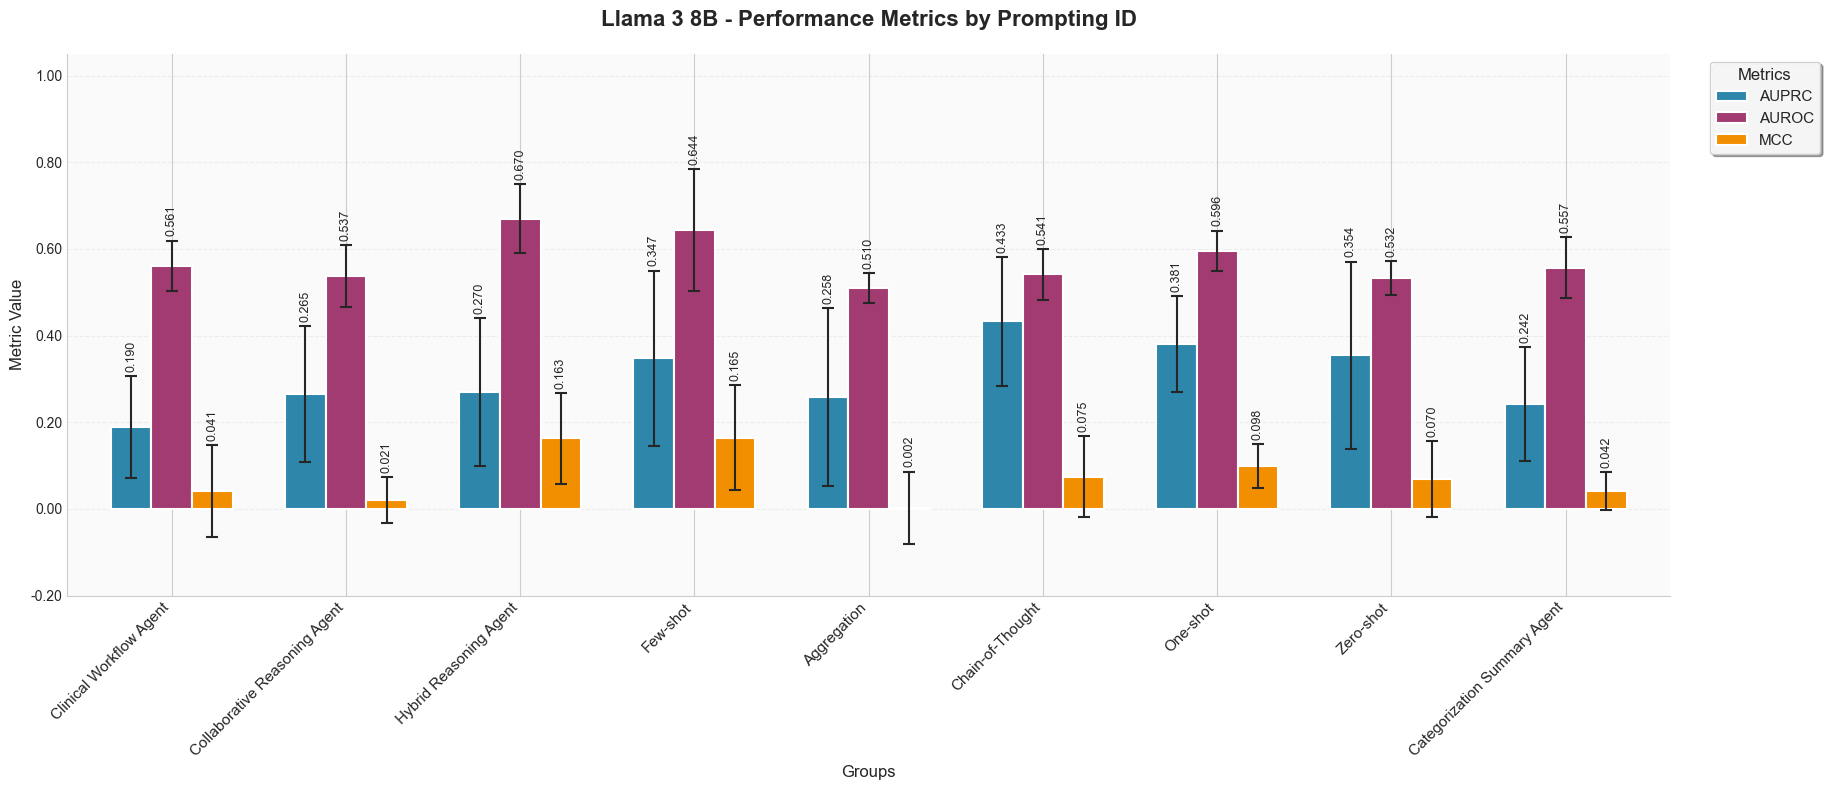

In [5]:
LLMAnalyzer.plot_metrics(
    df_results, group=["prompting_id"], title_prefix="Llama 3 8B - "
)

C:\Users\janbe\Documents\GitHub Repos\pulse\src\eval\llm_analyzer.py:865: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = plot_df.groupby(["Group", "Metric"], as_index=False).agg(


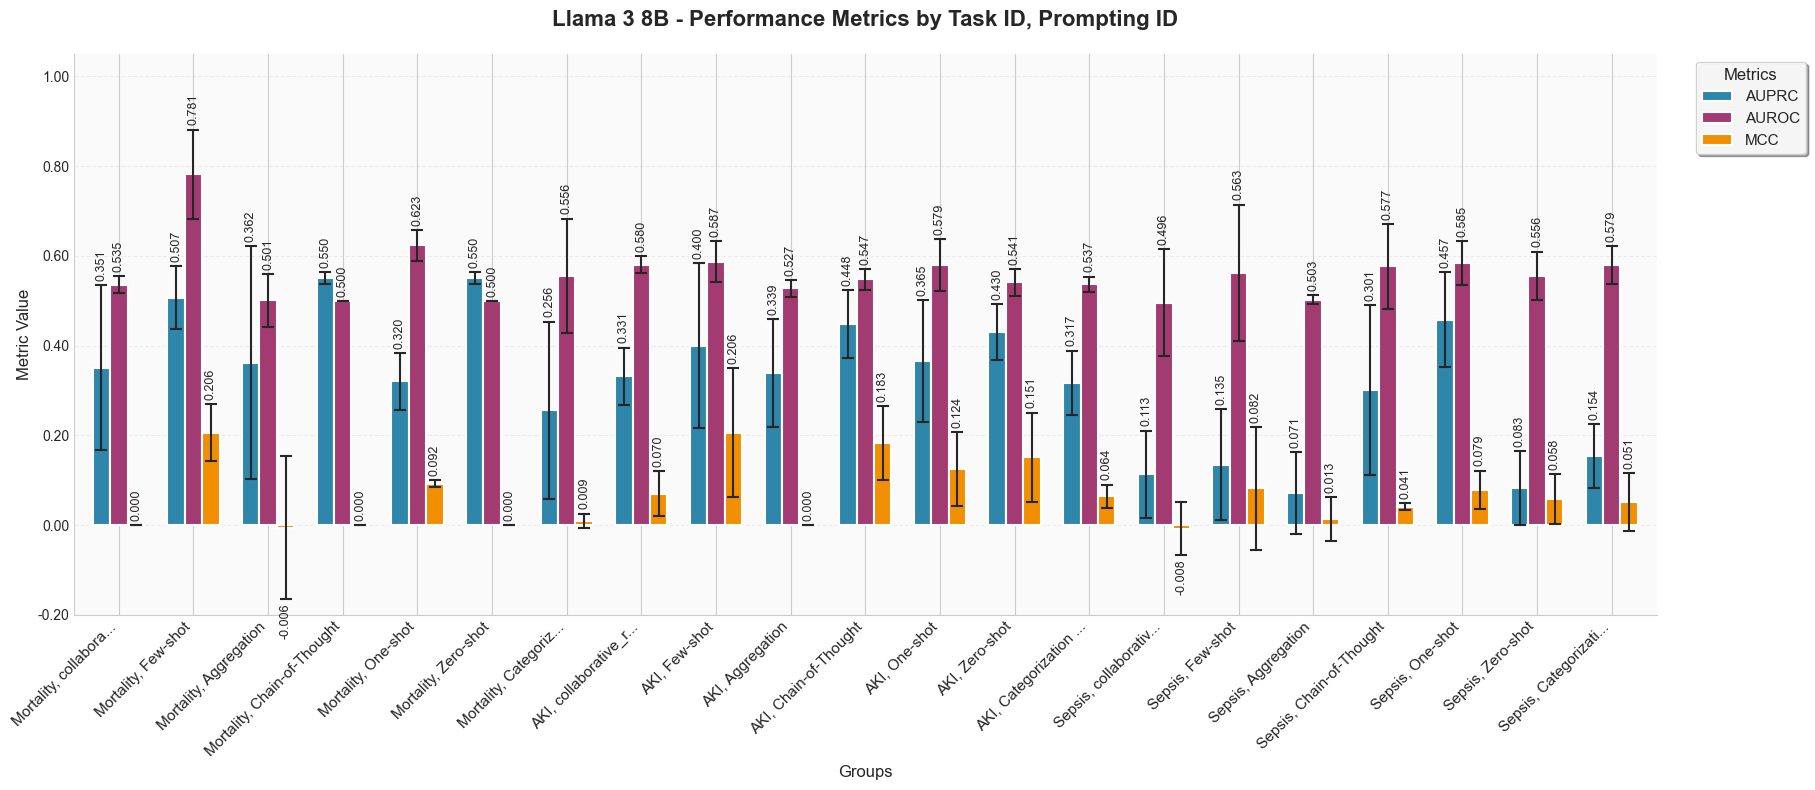

In [6]:
LLMAnalyzer.plot_metrics(
    df_results, group=["task_id","prompting_id"], title_prefix="Llama 3 8B - "
)

In [7]:
cat_files = LLMAnalyzer.categorize_files(
    [os.path.join(base_output_dir, name) for name in os.listdir(base_output_dir)],
    verbose=False,
)
df_mdata = LLMAnalyzer.load_metadata(cat_files["metadata_files"])
print("Total Input Tokens:", df_mdata['Input Tokens'].sum())
print("Total Output Tokens:", df_mdata['Output Tokens'].sum())

Model Name: Llama3, Task: aki, Dataset: eicu, Timestamp: 20250628_161151
Model Name: Llama3, Task: aki, Dataset: hirid, Timestamp: 20250628_161151
Model Name: Llama3, Task: aki, Dataset: miiv, Timestamp: 20250628_161151
Model Name: Llama3, Task: mortality, Dataset: eicu, Timestamp: 20250628_161151
Model Name: Llama3, Task: mortality, Dataset: hirid, Timestamp: 20250628_161151
Model Name: Llama3, Task: mortality, Dataset: miiv, Timestamp: 20250628_161151
Model Name: Llama3, Task: sepsis, Dataset: eicu, Timestamp: 20250628_161151
Model Name: Llama3, Task: sepsis, Dataset: hirid, Timestamp: 20250628_161151
Model Name: Llama3, Task: sepsis, Dataset: miiv, Timestamp: 20250628_161151
Model Name: Llama3, Task: aki, Dataset: eicu, Timestamp: 20250621_095219
Model Name: Llama3, Task: aki, Dataset: hirid, Timestamp: 20250621_095219
Model Name: Llama3, Task: aki, Dataset: miiv, Timestamp: 20250621_095219
Model Name: Llama3, Task: mortality, Dataset: eicu, Timestamp: 20250621_095219
Model Name: Ll

--- Prediction Distribution Statistics ---
Total Records: 2950
Ground Truth Positive Samples: 693
Ground Truth Negative Samples: 2257
Mean Predicted Probability (Average of All Predictions): 0.239
Std Predicted Probability: 0.378
Calibration Error (|Mean Pred. Prob. - Ground Truth Pos. Rate|): 0.004
True Positives: 327
True Negatives: 1737
False Positives: 520
False Negatives: 366
Accuracy (at 0.5 threshold): 0.700
AUPRC: 0.355


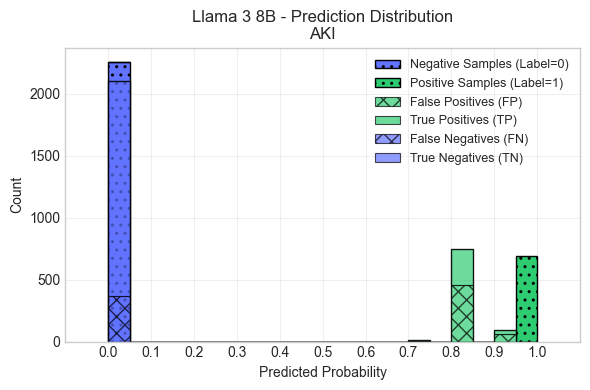

--- Prediction Distribution Statistics ---
Total Records: 300
Ground Truth Positive Samples: 30
Ground Truth Negative Samples: 270
Mean Predicted Probability (Average of All Predictions): 0.586
Std Predicted Probability: 0.395
Calibration Error (|Mean Pred. Prob. - Ground Truth Pos. Rate|): 0.486
True Positives: 28
True Negatives: 108
False Positives: 162
False Negatives: 2
Accuracy (at 0.5 threshold): 0.453
AUPRC: 0.492


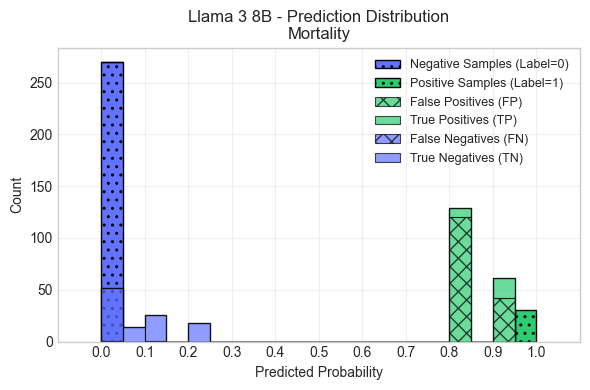

--- Prediction Distribution Statistics ---
Total Records: 2939
Ground Truth Positive Samples: 145
Ground Truth Negative Samples: 2794
Mean Predicted Probability (Average of All Predictions): 0.199
Std Predicted Probability: 0.340
Calibration Error (|Mean Pred. Prob. - Ground Truth Pos. Rate|): 0.150
True Positives: 66
True Negatives: 2203
False Positives: 591
False Negatives: 79
Accuracy (at 0.5 threshold): 0.772
AUPRC: 0.133


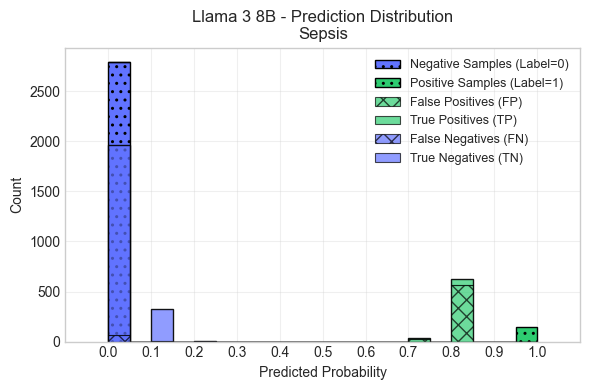

--- Prediction Distribution Statistics ---
Total Records: 6189
Ground Truth Positive Samples: 868
Ground Truth Negative Samples: 5321
Mean Predicted Probability (Average of All Predictions): 0.237
Std Predicted Probability: 0.370
Calibration Error (|Mean Pred. Prob. - Ground Truth Pos. Rate|): 0.097
True Positives: 421
True Negatives: 4048
False Positives: 1273
False Negatives: 447
Accuracy (at 0.5 threshold): 0.722
AUPRC: 0.214


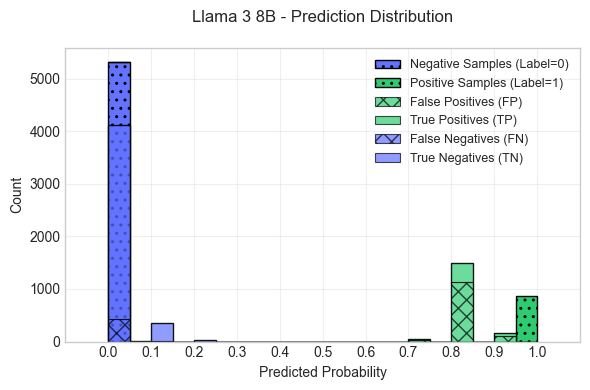

In [13]:
# Distribution of predictions
LLMAnalyzer.plot_prediction_distribution(
    df_mdata,
    title_prefix="Llama 3 8B - Prediction Distribution",
    data_filter={"task": ["aki"]},
    show_stats=True,
    color_neg="#6173FF",
    color_pos="#2ECC71",
)

LLMAnalyzer.plot_prediction_distribution(
    df_mdata,
    title_prefix="Llama 3 8B - Prediction Distribution",
    data_filter={"task": ["mortality"]},
    show_stats=True,
    color_neg="#6173FF",
    color_pos="#2ECC71",
)


LLMAnalyzer.plot_prediction_distribution(
    df_mdata,
    title_prefix="Llama 3 8B - Prediction Distribution",
    data_filter={"task": ["sepsis"]},
    show_stats=True,
    color_neg="#6173FF",
    color_pos="#2ECC71",
)

LLMAnalyzer.plot_prediction_distribution(
    df_mdata,
    title_prefix="Llama 3 8B - Prediction Distribution",
    # data_filter={"task": ["mortality"]},
    show_stats=True,
    color_neg="#6173FF",
    color_pos="#2ECC71",
)